# Exploratory Data Analysis (EDA) for Movie Overview Dataset

We perform EDA on a cleaned movie dataset (2015-2023) to uncover patterns and insights. Key steps include text preprocessing of movie overviews, visualization of language distribution, analysis of overview lengths, extraction of common words, and creation of word clouds. It further explores numeric feature correlations, relationships between ratings and popularity, and genre-based variations in overview lengths.

In [1]:
# Import necessary libraries
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from collections import Counter
from nltk.util import ngrams

In [2]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Load the dataset
df = pd.read_csv('data/cleaned_movies_2015_2023_genres.csv')

In [4]:
# Load stopwords for English and German
stop_words = set(stopwords.words('english')).union(set(stopwords.words('german')))
lemmatizer = WordNetLemmatizer()

In [5]:
# Function for text preprocessing
def preprocess_text(text):
    # Remove HTML tags, URLs, numbers, and special characters
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower().strip()
    
    # Tokenization and stopword removal
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    
    return ' '.join(words)

In [6]:
# Apply preprocessing to the 'overview' column
df['cleaned_overview'] = df['overview'].dropna().apply(preprocess_text)


In [7]:
# Save the preprocessed data
df.to_csv('data/movies_2015_2023_preprocessed_genre.csv', index=False)

### EDA - Exploratory Data Analysis ###

/tmp/ipykernel_5823/1515097731.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette='viridis')


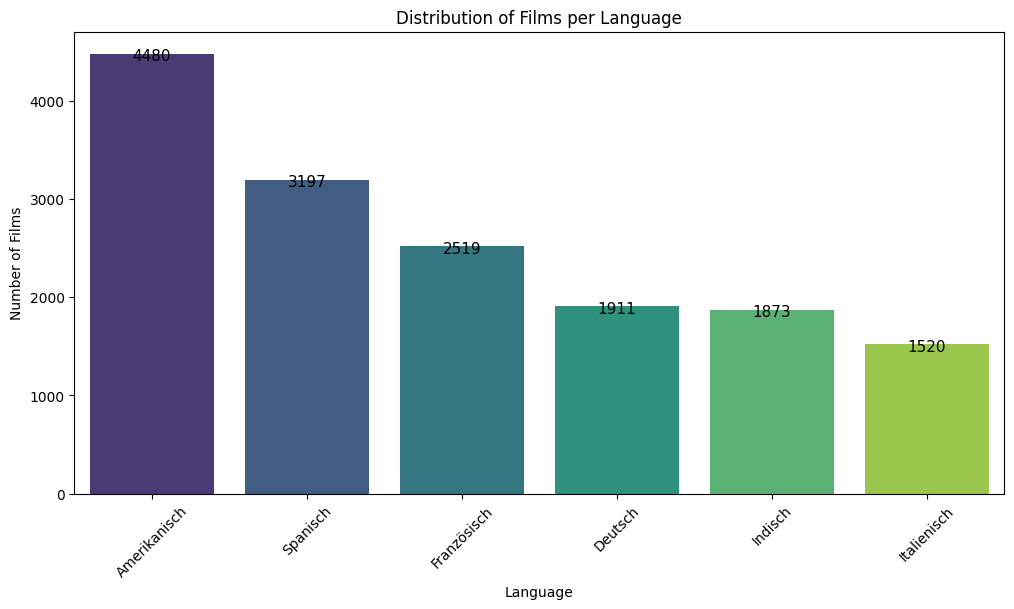

In [8]:
# 1. Language Distribution (With Improved Visuals)
language_counts = df['language'].value_counts()

plt.figure(figsize=(12, 6))
sorted_counts = language_counts.sort_values(ascending=False)
sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette='viridis')
plt.title('Distribution of Films per Language')
plt.xlabel('Language')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)

# Add data labels
for i, count in enumerate(sorted_counts.values):
    plt.text(i, count + 50, str(count), ha='center', va='top', fontsize=11)

plt.show()


Overview length summary:
                count       mean        std  min   25%   50%   75%    max
language                                                                
Amerikanisch  4480.0  23.947098  12.172116  2.0  15.0  21.0  30.0   94.0
Deutsch       1911.0  31.468341  19.776048  2.0  17.0  26.0  42.0  104.0
Französisch   2519.0  26.586344  14.867150  2.0  16.0  23.0  35.0   95.0
Indisch       1873.0  22.904431  14.812465  0.0  14.0  18.0  27.0   96.0
Italienisch   1520.0  27.302632  18.411842  1.0  14.0  22.0  36.0   93.0
Spanisch      3197.0  22.879262  14.042838  2.0  13.0  19.0  29.0  107.0


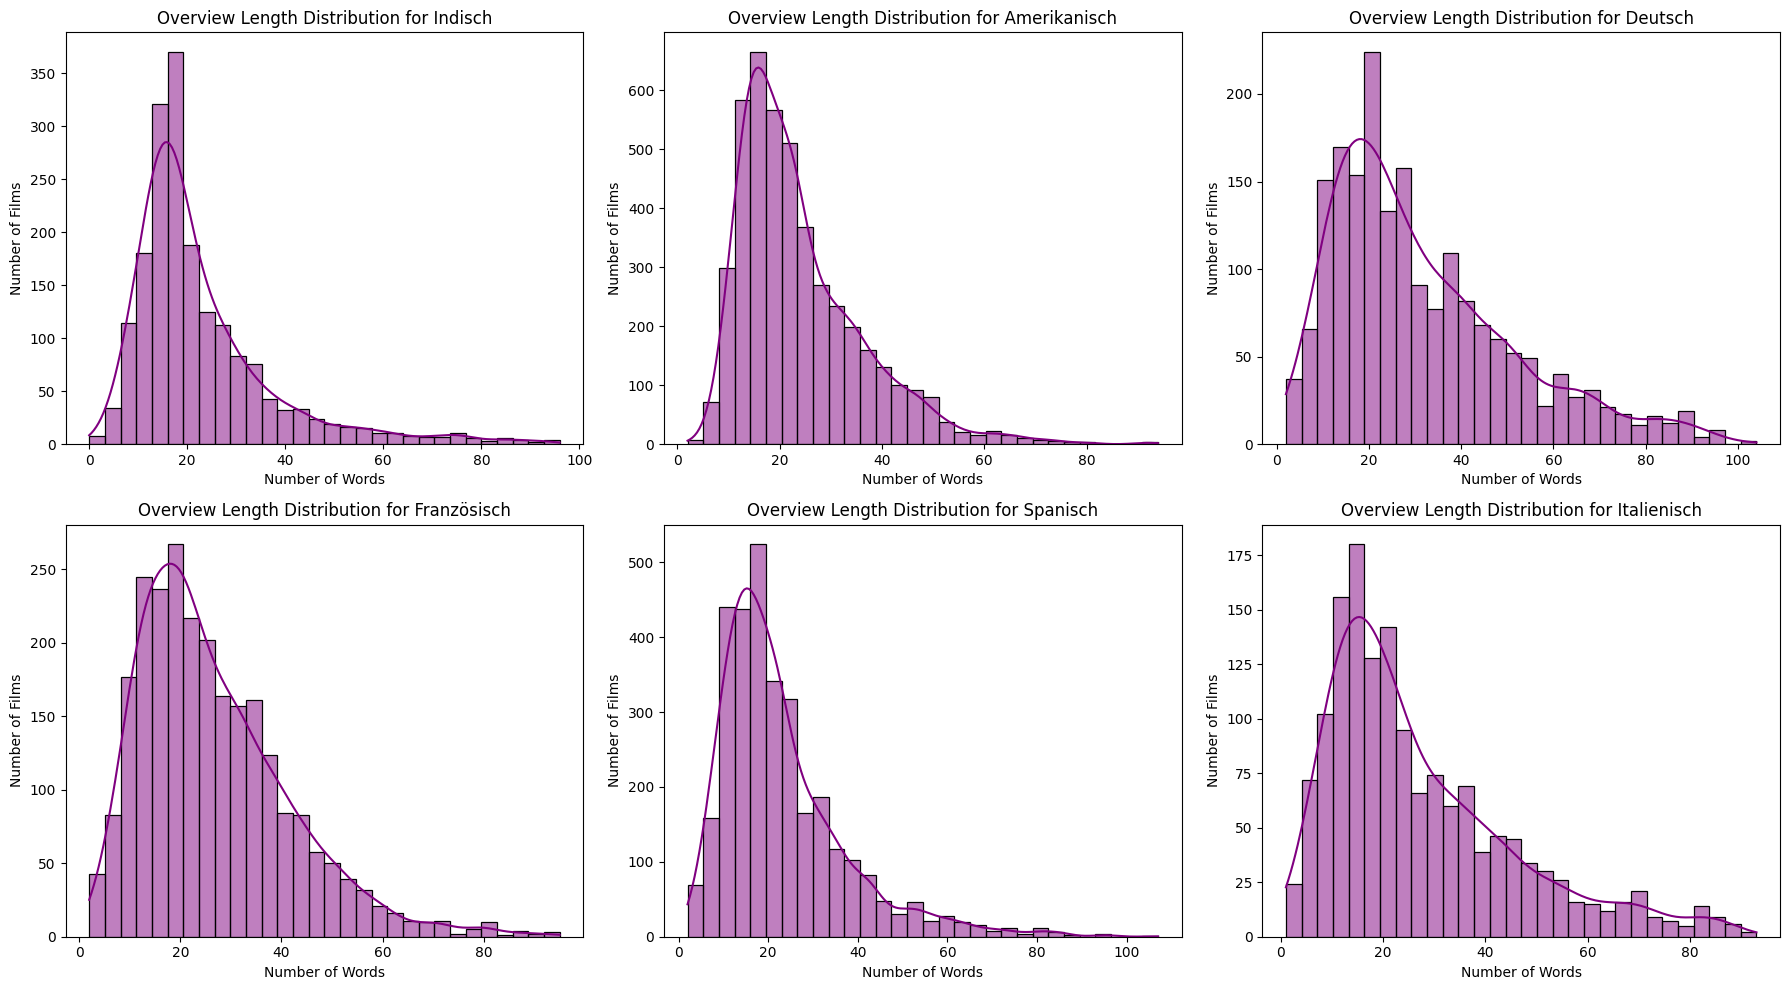

In [9]:
# Ensure all entries in 'cleaned_overview' are strings and handle NaN values
df['cleaned_overview'] = df['cleaned_overview'].fillna('').astype(str)

# 2. Overview Length Distribution per Language
# Calculate overview length
df['overview_length'] = df['cleaned_overview'].apply(lambda x: len(x.split()))

# Display summary statistics for overview length
overview_length_summary = df.groupby('language')['overview_length'].describe()
print("Overview length summary:\n", overview_length_summary)

# Plot distributions using a grid layout for comparison
languages = df['language'].unique()
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, language in enumerate(languages):
    sns.histplot(df[df['language'] == language]['overview_length'], bins=30, kde=True, ax=axes[i], color='purple')
    axes[i].set_title(f'Overview Length Distribution for {language}')
    axes[i].set_xlabel('Number of Words')
    axes[i].set_ylabel('Number of Films')

plt.tight_layout()
plt.show()


In [10]:

# 3. Most Common Words and N-Grams
# Extract all words and bigrams
all_words = []
all_bigrams = []

for text in df['cleaned_overview']:
    all_words.extend(text.split())
    all_bigrams.extend(ngrams(text.split(), 2))

# Most common words
word_counts = Counter(all_words)
print("Most common words:", word_counts.most_common(10))

# Most common bigrams
bigram_counts = Counter(all_bigrams)
print("Most common bigrams:", bigram_counts.most_common(10))

Most common words: [('life', 4121), ('love', 2623), ('one', 2289), ('young', 2190), ('family', 2097), ('find', 1995), ('friend', 1980), ('two', 1881), ('new', 1722), ('year', 1718)]
Most common bigrams: [(('best', 'friend'), 452), (('fall', 'love'), 379), (('young', 'woman'), 369), (('year', 'old'), 309), (('one', 'day'), 296), (('high', 'school'), 253), (('love', 'story'), 190), (('new', 'york'), 183), (('small', 'town'), 175), (('first', 'time'), 141)]


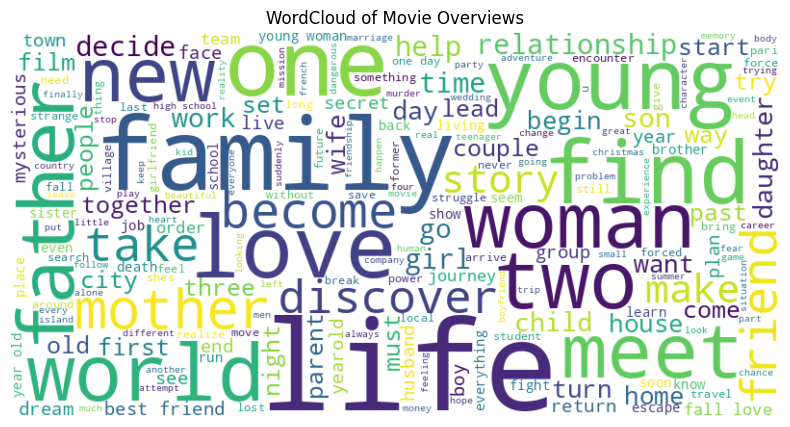

In [11]:
# 4. WordCloud for Overall Overviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Movie Overviews')
plt.show()

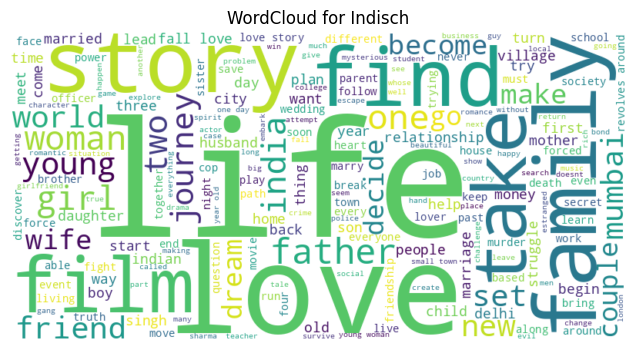

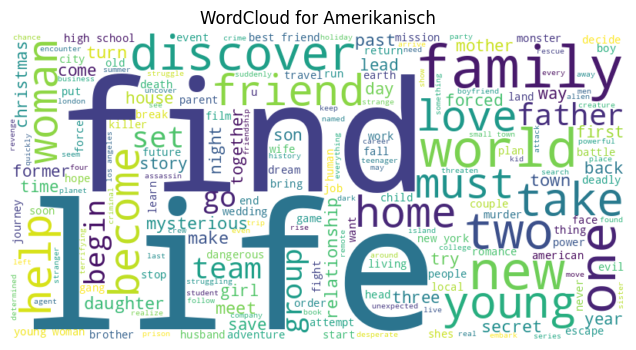

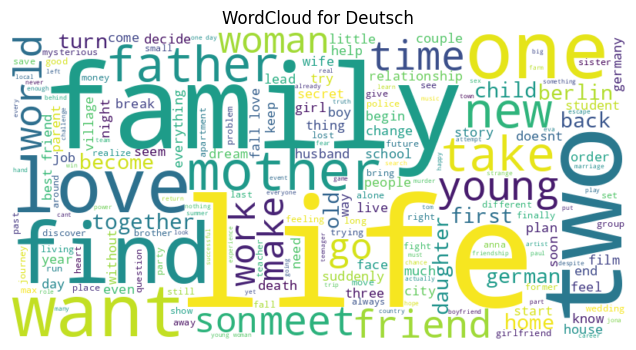

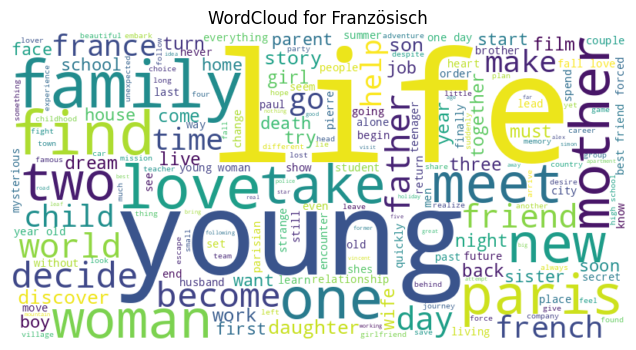

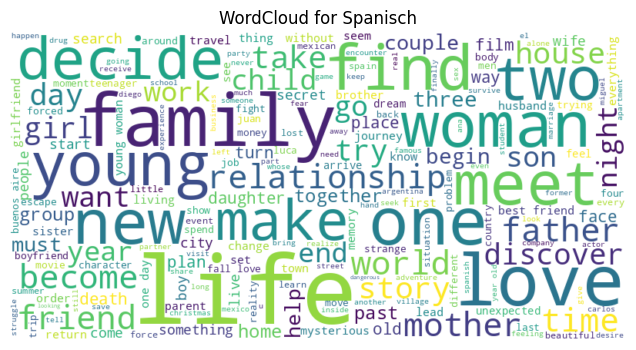

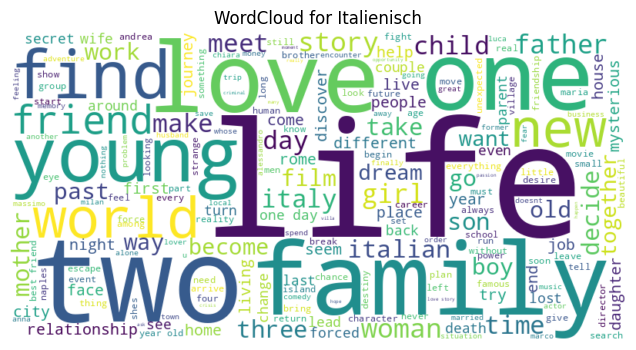

In [12]:
# 5. WordCloud for Each Language
def create_wordcloud(language_data, language_name):
    text = ' '.join(language_data.dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {language_name}')
    plt.show()

for language in languages:
    language_data = df[df['language'] == language]['overview']
    create_wordcloud(language_data, language)

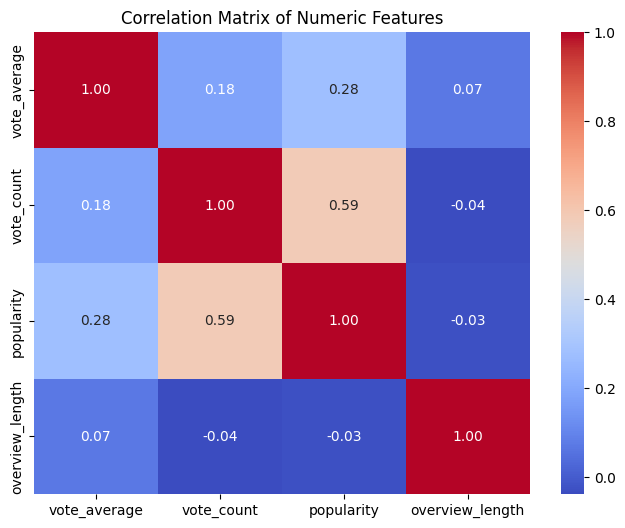

In [13]:
# 6. Correlation Matrix for Numeric Features
correlation_matrix = df[['vote_average', 'vote_count', 'popularity', 'overview_length']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()


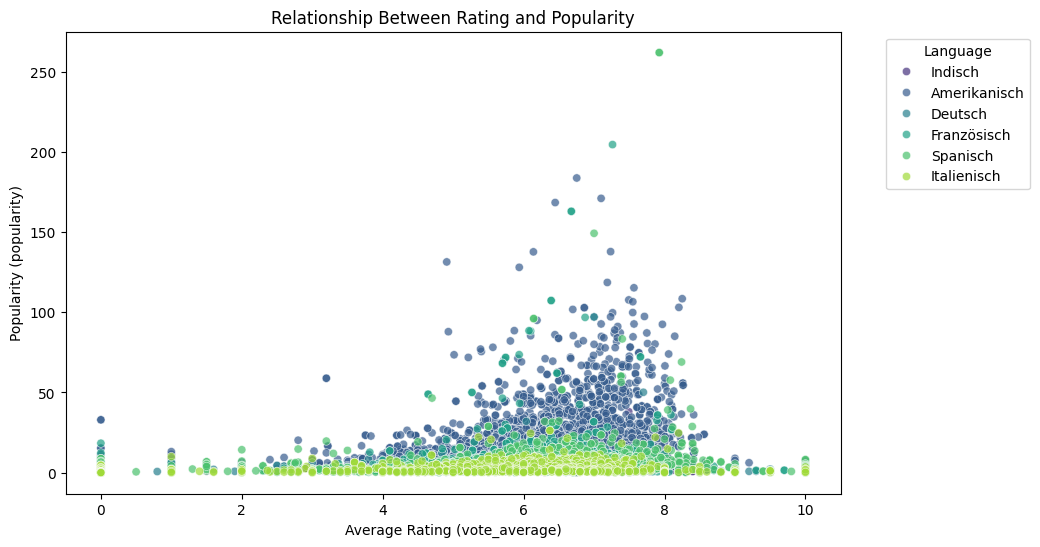

In [14]:
# 7. Relationship Between Rating and Popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vote_average', y='popularity', data=df, hue='language', palette='viridis', alpha=0.7)
plt.title('Relationship Between Rating and Popularity')
plt.xlabel('Average Rating (vote_average)')
plt.ylabel('Popularity (popularity)')
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [15]:
# 9. Top Words per Language
def get_top_words_by_language(df, language, top_n=10):
    words = []
    for text in df[df['language'] == language]['cleaned_overview']:
        words.extend(text.split())
    word_counts = Counter(words)
    return word_counts.most_common(top_n)

/tmp/ipykernel_5823/1666171896.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


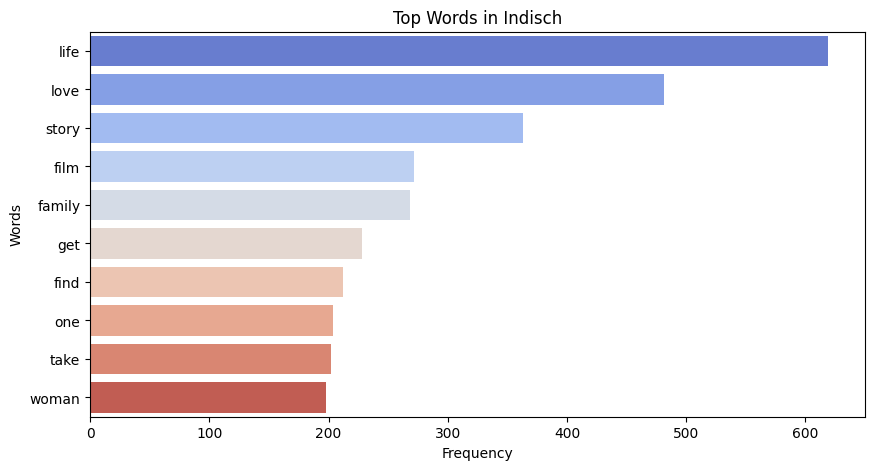

/tmp/ipykernel_5823/1666171896.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


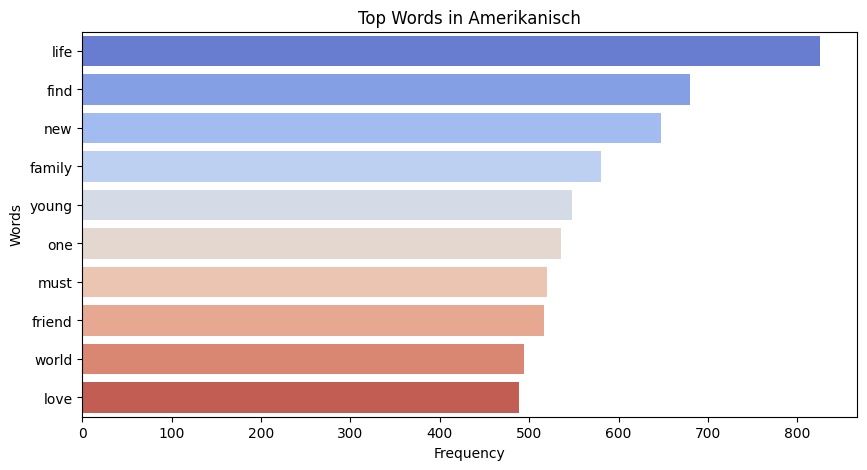

/tmp/ipykernel_5823/1666171896.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


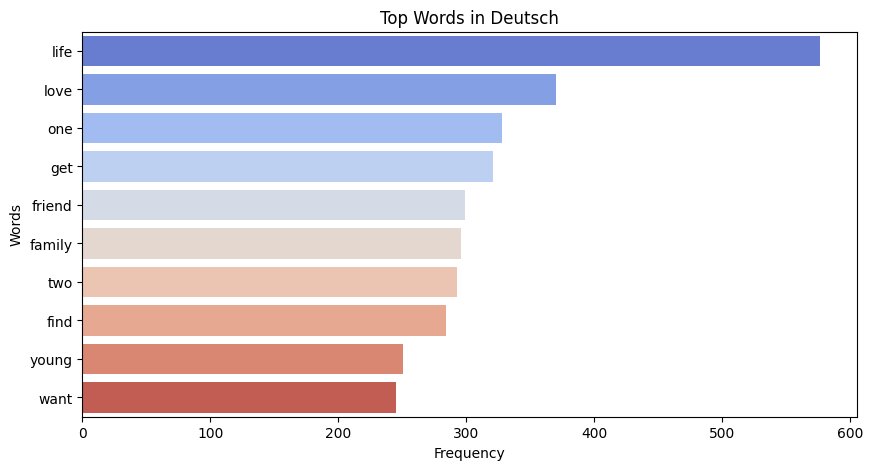

/tmp/ipykernel_5823/1666171896.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


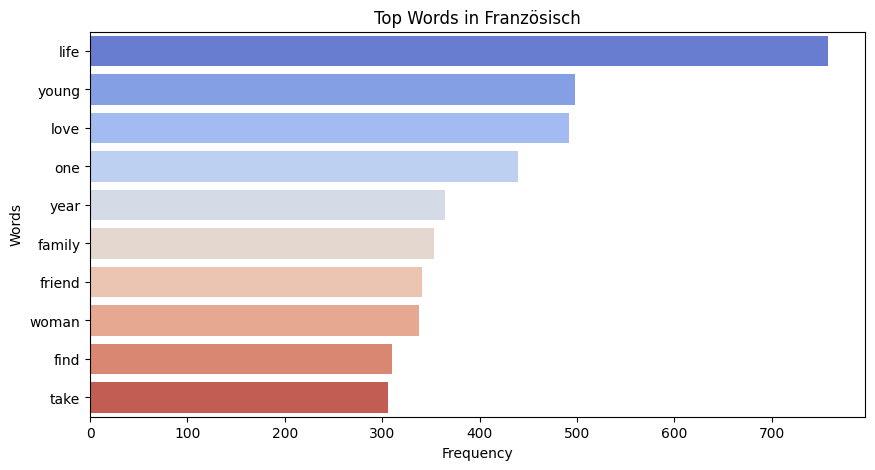

/tmp/ipykernel_5823/1666171896.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


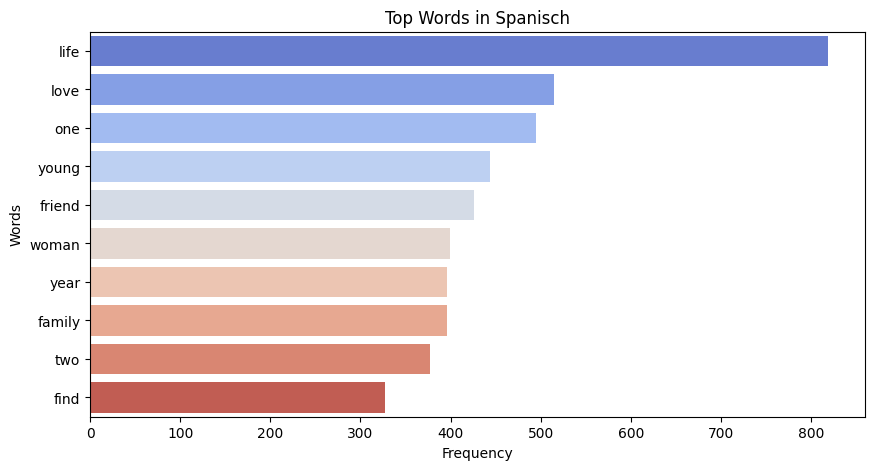

/tmp/ipykernel_5823/1666171896.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


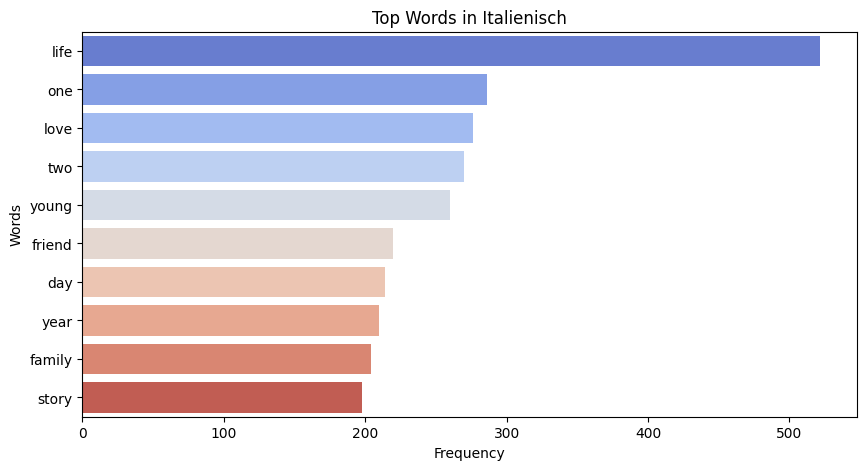

In [16]:
# Generate and visualize top words for each language
for language in languages:
    top_words = get_top_words_by_language(df, language)
    words, counts = zip(*top_words)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(counts), y=list(words), palette='coolwarm')
    plt.title(f'Top Words in {language}')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

/tmp/ipykernel_5823/1169099834.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_length_by_language.index, y=average_length_by_language.values, palette='magma')


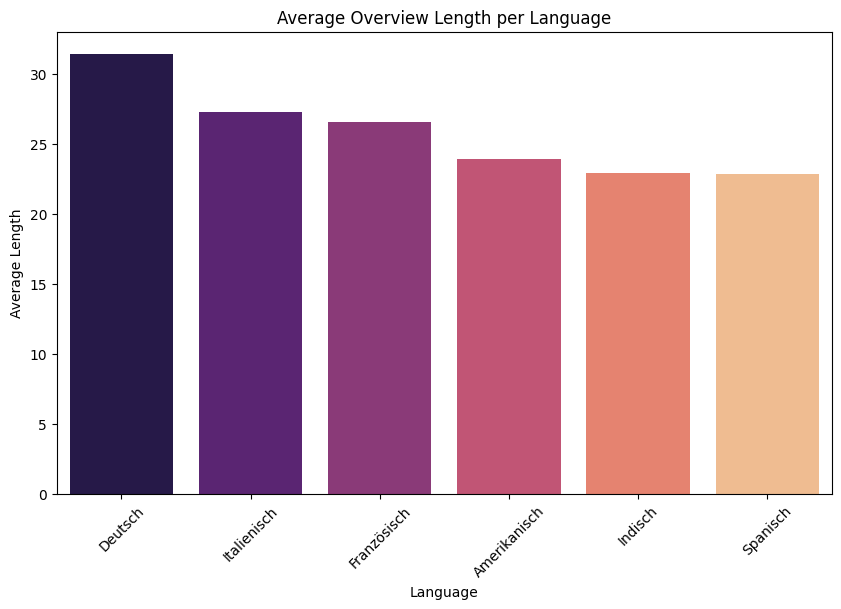

In [17]:
# 10. Average Overview Length per Language
average_length_by_language = df.groupby('language')['overview_length'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=average_length_by_language.index, y=average_length_by_language.values, palette='magma')
plt.title('Average Overview Length per Language')
plt.xlabel('Language')
plt.ylabel('Average Length')
plt.xticks(rotation=45)
plt.show()

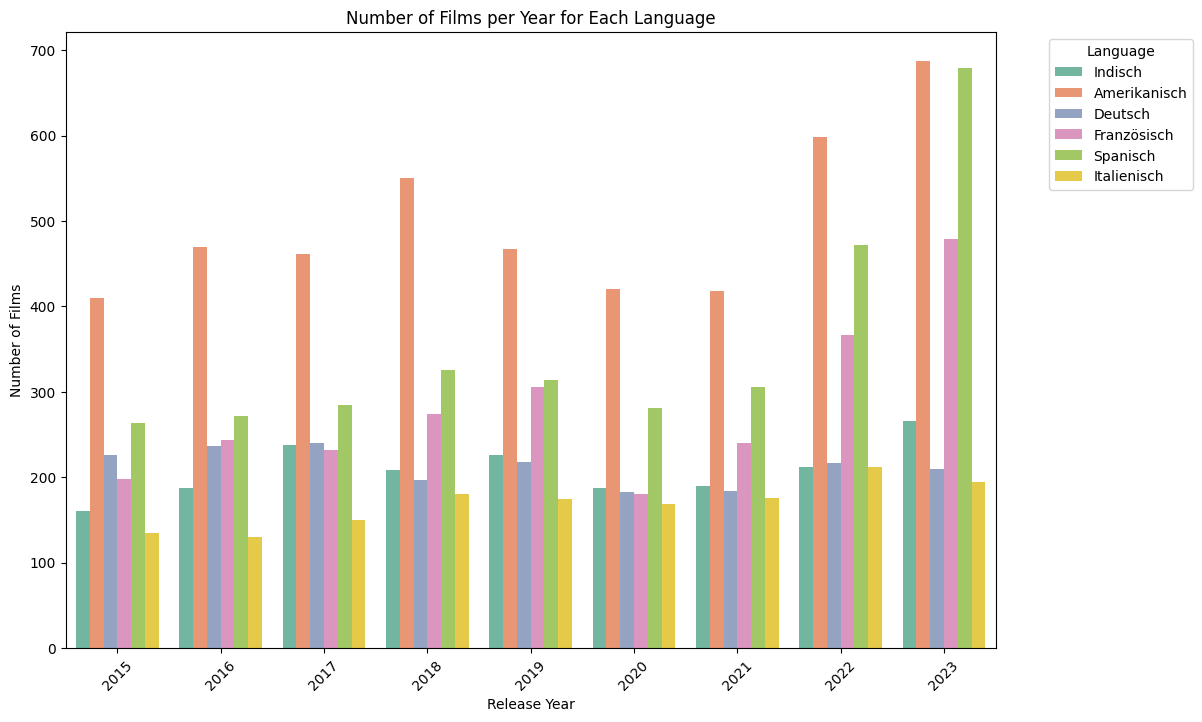

In [18]:
# 11. Number of Films per Year and Language
plt.figure(figsize=(12, 8))
sns.countplot(x='release_year', hue='language', data=df, palette='Set2')
plt.title('Number of Films per Year for Each Language')
plt.xlabel('Release Year')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/tmp/ipykernel_5823/2082825427.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_length_by_genre.index, y=average_length_by_genre.values, palette='viridis')


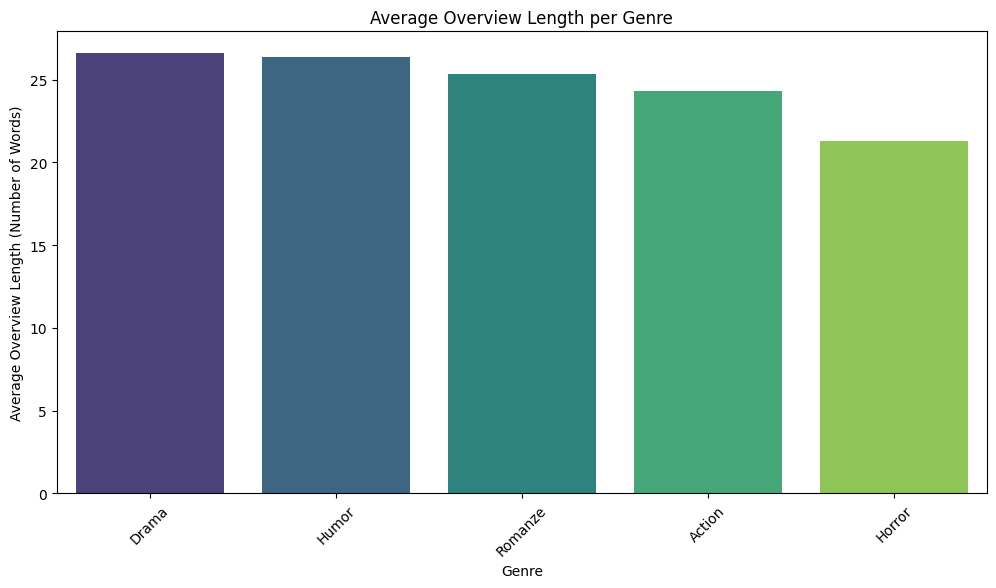

In [19]:
average_length_by_genre = df.groupby('genre')['overview_length'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=average_length_by_genre.index, y=average_length_by_genre.values, palette='viridis')
plt.title('Average Overview Length per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Overview Length (Number of Words)')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_5823/1138830549.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='genre', y='overview_length', palette='Set3')


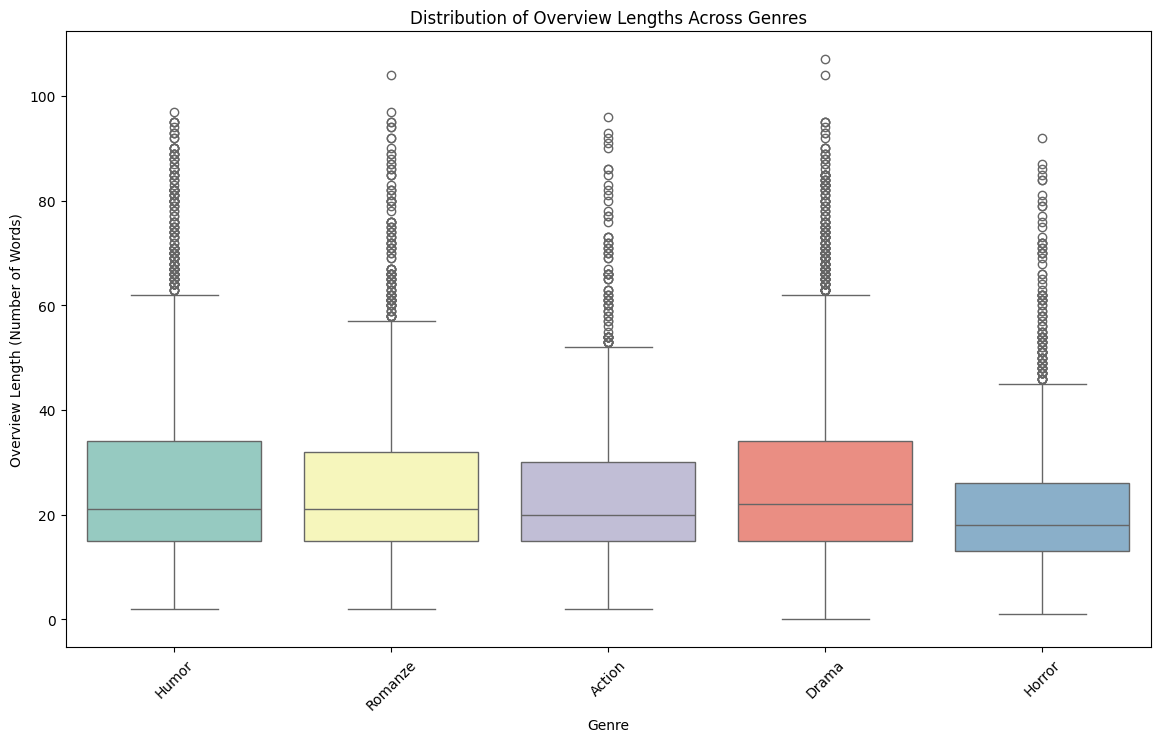

In [20]:
# 9. Box Plot of Overview Lengths Across Genres
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='genre', y='overview_length', palette='Set3')
plt.title('Distribution of Overview Lengths Across Genres')
plt.xlabel('Genre')
plt.ylabel('Overview Length (Number of Words)')
plt.xticks(rotation=45)
plt.show()